In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Used_Bikes.csv")
# print(df)
df.head()


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [2]:
##feature selection --imp step
cat_col=df.drop(["bike_name","city"],axis=1)
cat_col.head()
# cat_col=df.drop(["bike_name","city"],axis=1)
# cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
#data divide into numerical and cagtegorical coloumns
cat_col=df.select_dtypes(include="O")
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [5]:
## numerical data separated
num_col=df.select_dtypes(exclude="O")
num_col.head()


,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [6]:
df.duplicated().sum()
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32643     True
32644     True
32645     True
32646     True
32647     True
Length: 32648, dtype: bool

In [7]:
##feature selection --imp step
cat_col=cat_col.drop(["bike_name","city"],axis=1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [8]:
##encoding char----> num
#there are mainly two types of encoding in machine learning -->
##1. label encoding
##2.one hot encoding





In [9]:
##one hot encoding
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
##label encoding
cat_col["owner"].value_counts()


owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [11]:
dt={
    "First Owner": 1,
    "Second Owner":2,
    "Third Owner":3,
    "Fourth Owner Or More":4
}

In [12]:
cat_col["owner"]=cat_col["owner"].map(dt) #map ko ek bar hi chaleyenge nhi to nan value dega
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [13]:
cat_col["brand"].value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: count, dtype: int64

In [14]:
{i:key for key,i in enumerate(list(cat_col["brand"].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [15]:
dt1={
    'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22
}
cat_col["brand"]=cat_col["brand"].map(dt1)
cat_col.head()


,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [16]:
##now we concanetate
final_df=pd.concat([cat_col,num_col],axis=1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [17]:
##relationship find
metrix=final_df.corr()
metrix.head()

#owner ka owner se 1 baki 0


,owner,brand,price,kms_driven,age,power
owner,1.000000,-0.071885,-0.040164,-0.013661,0.292523,0.044031
brand,-0.071885,1.000000,0.394474,-0.029519,-0.050883,0.213429
price,-0.040164,0.394474,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.013661,-0.029519,-0.313955,1.000000,0.484684,-0.264016
age,0.292523,-0.050883,-0.399133,0.484684,1.000000,-0.337035


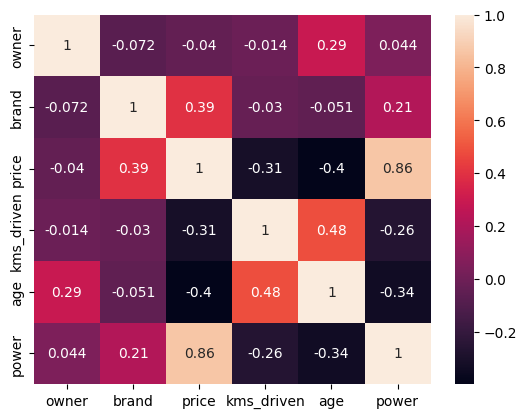

In [18]:
sns.heatmap(metrix,annot=True) #heatmap->correleted data pr
plt.show()

In [19]:
##data dividing into independent and dependent variable
y = final_df["price"]
x = final_df.drop("price",axis=1)

In [20]:
x

,owner,brand,kms_driven,age,power
0,1,0,17654.0,3.0,110.0
1,1,1,11000.0,4.0,350.0
2,1,2,110.0,8.0,675.0
3,1,0,16329.0,4.0,180.0
4,1,3,10000.0,3.0,150.0
...,...,...,...,...,...
32643,1,5,22000.0,4.0,100.0
32644,1,0,6639.0,9.0,180.0
32645,1,6,20373.0,6.0,220.0
32646,1,5,84186.0,16.0,125.0


In [21]:
y

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32648, dtype: float64

In [22]:
##scikit -learn ->machine learning se deal


In [23]:
##train and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,
    random_state=42
)

In [24]:
#algorithm ko kaise laye:
from sklearn.linear_model import LinearRegression
model=LinearRegression() #object banaya hai linear regression class ka
model.fit(x_train,y_train) #algorithm train ho chuki hai



LinearRegression()

In [25]:
model.score(x_test,y_test) #model ki accuracy btata hai

0.7808546293943684

In [26]:
model.score(x_train,y_train) #performsnc

0.8149843359281899

In [27]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([ 12617.77757254,  26060.57737594,  21523.77299702, ...,
       485412.94126847,  51650.94939975,  92180.94726045], shape=(6530,))

In [28]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1.head()

,Actual,Predicted
28994,18000.0,12617.777573
31433,43000.0,26060.577376
17250,10000.0,21523.772997
13738,14227.0,28583.859188
24577,87000.0,115457.785197


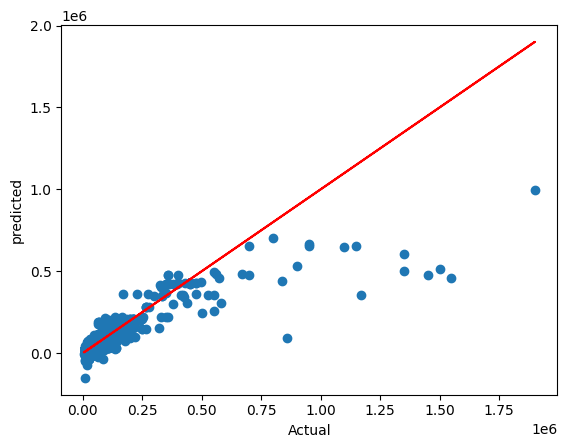

In [29]:
##plot the best fit line
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.plot(y_test,y_test,color="red")